# Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table

# Read preliminar model results

In [ ]:
ada = Table.read('../Report_2/tables/ada.tex').to_pandas().set_index('col0')
baggin = Table.read('../Report_2/tables/baggin.tex').to_pandas().set_index('col0')
forest = Table.read('../Report_2/tables/forest.tex').to_pandas().set_index('col0')
xgb = Table.read('../Report_2/tables/xgb.tex').to_pandas().set_index('col0')


In [19]:
# Initialize an empty dictionary to store precision values
precision_dict = {}

# List of datasets and their corresponding names
datasets = {
    "AdaBoost": ada,
    "Bagging": baggin,
    "Random Forest": forest,
    "XGBoost": xgb
}

# Extract precision values for each class from each dataset
for model_name, df in datasets.items():
    # Assuming the precision values are stored in a column named 'precision'
    precision_dict[model_name] = df.iloc[0:5, 0].to_dict()

# Display the dictionary
print(precision_dict)

# Example structure of precision_dict:
# {
#     "AdaBoost": {"class_0": 0.85, "class_1": 0.78, "class_2": 0.92},
#     "Bagging": {"class_0": 0.88, "class_1": 0.80, "class_2": 0.90},
#     ...
# }

{'AdaBoost': {'0': 0.63, '1': 0.0, '2': 0.0, '3': 0.0, '4': 0.2}, 'Bagging': {'0': 0.71, '1': 0.0, '2': 0.0, '3': 0.0, '4': 0.07}, 'Random Forest': {'0': 0.67, '1': 0.0, '2': 0.0, '3': 0.0, '4': 0.15}, 'XGBoost': {'0': 0.76, '1': 0.3, '2': 0.33, '3': 0.33, '4': 0.25}}


([<matplotlib.axis.XTick at 0x21737985c50>,
 [Text(0, 0, 'Ausencia'),
  Text(1, 0, 'Leve'),
  Text(2, 0, 'Moderada'),
  Text(3, 0, 'Severa'),
  Text(4, 0, 'Crítica')])

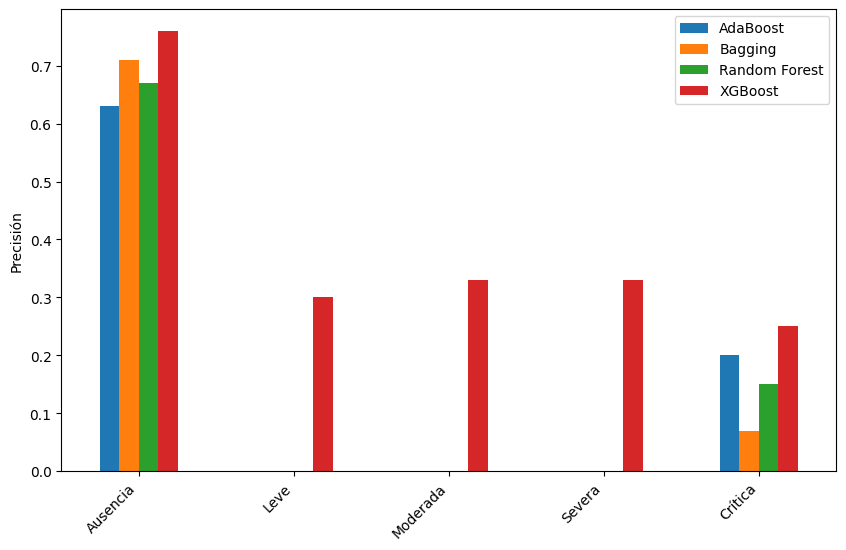

In [23]:
pd.DataFrame(precision_dict).plot(kind='bar', figsize=(10, 6),
                                  ylabel='Precisión'  # Label for the y-axis
                                  )
plt.xticks(ticks=range(len(['Ausencia', 'Leve', 'Moderada', 'Severa', 'Crítica'])),  # Indices of the x-ticks
    labels=['Ausencia', 'Leve', 'Moderada', 'Severa', 'Crítica'],  # Custom labels
    rotation=45,  # Rotate labels for better visibility
    ha='right')

In [25]:
# read final tables
validated = Table.read('../Report_2/tables/final_model_validated.tex').to_pandas().set_index('col0')
tested = Table.read('../Report_2/tables/final_model.tex').to_pandas().set_index('col0')
selected = xgb

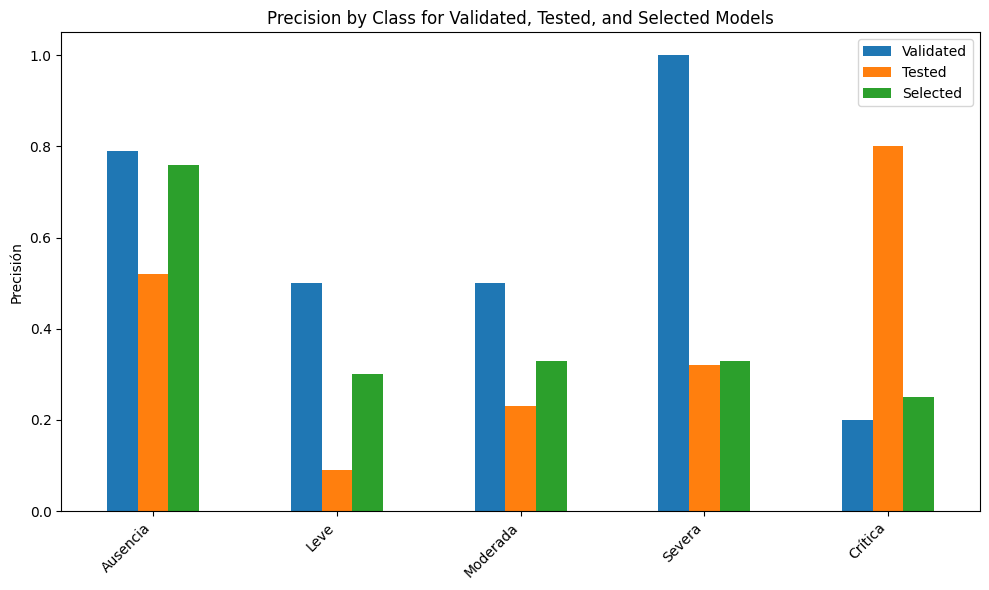

In [30]:
# Combine the precision values from all DataFrames into a single DataFrame
precision_df = pd.DataFrame({
    'Validated': validated.iloc[0:5,0],
    'Tested': tested.iloc[0:5,0],
    'Selected': selected.iloc[0:5,0]
})

# Plot the precision values
precision_df.plot(kind='bar', figsize=(10, 6))

# Set custom x-tick labels
plt.xticks(
    ticks=range(len(precision_df.index)),  # Indices of the x-ticks
    labels=['Ausencia', 'Leve', 'Moderada', 'Severa', 'Crítica'],  # Use the index of the DataFrame as labels
    rotation=45,  # Rotate labels for better visibility
    ha='right'  # Align labels to the right
)

# Add labels and title
plt.ylabel('Precisión')
plt.title('Precision by Class for Validated, Tested, and Selected Models')
plt.xlabel('')
# Adjust layout and show the plot
plt.tight_layout()
plt.show()